In [1]:
import sys
sys.path.append('..')

In [2]:
from data_aquisition import twitter_data
from feature_engineering import features
import datetime as dt
import pandas as pd
import seaborn as sns
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.options.display.max_rows = 10000
pd.set_option('display.max_colwidth', 150)
pd.options.display.max_columns = 10000

In [4]:
# Taking a look at our labeled data
TTCM_labeled = pd.read_csv('../../data/pull_outTTCM_scored.csv')

In [5]:
print(TTCM_labeled.shape)
TTCM_labeled.head()

(1919, 8)


,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point
0,2021-03-23 03:37:35+00:00,LONGWORKS4ME,1374203647572242433a,RT @LesleyRHafalia: $TTCM lovin it #AR #AugmentedReality #NFT they litterally have 5 patents to RE #NFTs,NaN,0,1,NaN
1,2021-03-23 05:21:18+00:00,K_Duramaxx,1374229749078327296a,RT @MikeKnowsRunner: 🔥 $CAPC 🔥 \n\n$APQT $MRKR $IRNC $CTYX $TTCM $PVSP $HPIL $SNDD $ERHE $HVBTF $FDBL $DSCR $PRPM $IGPK $BFCH $BABL $LVVV $NW…,NaN,0,1,NaN
2,2021-03-23 08:10:22+00:00,ExtremeStock,1374272296140079104a,"$ttcm been asked why I don’t tweet as much about them. Love the ticker but if I post all the time ,it doesn’t mean… https://t.co/h3AIYb9b3Q",1.0,0,1,NaN
3,2021-03-23 09:56:10+00:00,Riju58477235,1374298918322774017a,$CHWY ADDED HEAVY today easy $!💸📈🛒 \n\n$GETH $CCTL $GEGI $DANR $LNGT $GXXM $SOUL $PCLI $PLPL $CLKA $DNRG $PTOP $TPNI… https://t.co/23LZ2YkqPT,1.0,0,1,NaN
4,2021-03-23 09:56:34+00:00,Riju58477235,1374299021292957705a,$QQQ OVERSOLD💸📈\n\n$ACCR $ACRL $ALPP $AVXL $BIEL $BIIB $BMIX $BNGO $CLSI $DBMM $DCGD $EMBR $EPAZ $FUNN $GCAN $GNCP… https://t.co/Se7dsHsfIe,1.0,0,1,NaN


In [6]:
# How many are labeled?
TTCM_labeled[TTCM_labeled['Sentiment'].notna()].shape

(518, 8)

Got 518 labeled.

In [7]:
TTCM_labeled.dtypes

Datetime             object
user.screen_name     object
id_str               object
text                 object
Sentiment           float64
Known_Pumper          int64
Price_Region          int64
Inflection_Point    float64
dtype: object

In [8]:
# Now looking at WNRS
WNRS_labeled = pd.read_csv('../../data/pull_outWNRS_scored.csv')

In [9]:
# How many are labeled?
WNRS_labeled[WNRS_labeled['Sentiment'].notna()].shape

(132, 8)

Got 132 labeled.

In [10]:
# Importing the other datasets 
paths =[
    "../../data/pull_outAXTG_scored.csv",
    "../../data/pull_outCERPQ_scored.csv",
    "../../data/pull_outDLPN_scored.csv",
    "../../data/pull_outEEENF_scored.csv",
    "../../data/pull_outGYST_scored.csv",
    "../../data/pull_outSOL_scored.csv"
]

In [11]:
def import_labeled_data(paths):
    labeled_data = pd.DataFrame()
    for path in paths:
        data = pd.read_csv(path)
        data = data[data['Sentiment'].notna()]
        data['id_str'] = data['id_str'].str.replace("a", "")
        labeled_data = labeled_data.append(data)
    return labeled_data

Now let's group them all together. Only need the cases that are actually labelled.

In [12]:
labeled = import_labeled_data(paths)

In [13]:
print(labeled.shape)
labeled.head()

(4693, 8)


,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point
0,2021-03-25 17:50:13+00:00,UCitnow,1375142994920271872,#RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EVO9MRPLEASE $AXTG New intern CEO https://t.co/oCOI6nRC6G,0.0,0,1.0,NaN
1,2021-03-25 17:50:48+00:00,UCitnow,1375143141058080768,RT @UCitnow: #RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EVO9MRPLEASE $AXTG New intern CEO https://t.co/oCOI6nRC6G,0.0,0,1.0,NaN
2,2021-03-25 18:47:48+00:00,Rad7RR,1375157484063584261,$AXTG Big OTC % Gainer!🚀🚀🚀,1.0,0,1.0,NaN
3,2021-03-25 20:02:03+00:00,GetScanz,1375176172099747845,Today’s Top Penny Stock Gainers\n\n$LTTGF $AXTG $SEVA $AFOM $DVLP $RGBPP $GNPK-WS $IMMP $ETFM\n\n#pennystocks… https://t.co/nBJ2yCqTZF,1.0,0,1.0,NaN
4,2021-03-25 20:02:48+00:00,christinebarnum,1375176361560604679,RT @GetScanz: Today’s Top Penny Stock Gainers\n\n$LTTGF $AXTG $SEVA $AFOM $DVLP $RGBPP $GNPK-WS $IMMP $ETFM\n\n#pennystocks #hotstocks #otcbb #…,1.0,0,1.0,NaN


In [14]:
all_data = twitter_data.read_all_twitter_data(folder='../data_aquisition/twitter_raw_data/clean_data/')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pas

In [15]:
all_data.shape

(61364, 341)

Starting with 61364 tweets.

In [16]:
all_data.dtypes

contributors                                                               object
coordinates                                                                object
created_at                                                                 object
entities.hashtags                                                          object
entities.media                                                             object
entities.symbols                                                           object
entities.urls                                                              object
entities.user_mentions                                                     object
extended_entities.media                                                    object
favorite_count                                                              int64
favorited                                                                    bool
geo                                                                        object
id              

In [17]:
all_data.head()

,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.metadata.iso_language_code,quoted_status.metadata.result_type,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_s

In [18]:
# Create column for eastern standard time 
all_data['Datetime_eastern'] = all_data.index.tz_convert('US/Eastern')
all_data.head()

,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.metadata.iso_language_code,quoted_status.metadata.result_type,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_s

In [19]:
# Merging sentiment data to original dataset 
labeled_data = labeled[['id_str', 'Sentiment', 'Known_Pumper']].merge(all_data, on='id_str')

In [20]:
labeled_data.dtypes

id_str                                                                                        object
Sentiment                                                                                    float64
Known_Pumper                                                                                   int64
contributors                                                                                  object
coordinates                                                                                   object
created_at                                                                                    object
entities.hashtags                                                                             object
entities.media                                                                                object
entities.symbols                                                                              object
entities.urls                                                                              

In [21]:
print(labeled_data.shape)
labeled_data.head()

(4465, 344)


,id_str,Sentiment,Known_Pumper,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.metadata.iso_language_code,quoted_status.metadata.result_type,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply

In [22]:
# Need to fix the mispelling in DLPN
labeled_data.loc[labeled_data['stock']=='DPLN', 'stock'] = "DLPN"

In [23]:
current_stocks = list(labeled_data['stock'].unique())
current_stocks

['AXTG', 'CERPQ', 'DLPN', 'EEENF', 'CAN', 'GYST', 'SOL']

In [21]:
labeled_data['Datetime_eastern'].max()

Timestamp('2021-04-02 19:46:59-0400', tz='US/Eastern')

In [22]:
labeled_data['Datetime_eastern'].min()

Timestamp('2021-03-22 23:32:08-0400', tz='US/Eastern')

Need to merge finance data to labeled dataset

In [20]:
import yfinance as yf

In [27]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        #tickers = "XSPA GNUS NKLA IBIO GME"
        tickers = current_stocks,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        #period = "5d",
        start = "2021-03-23",
        end = "2021-03-30",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  7 of 7 completed


In [28]:
def get_stock_data(tickers, start, end, interval="1m"):
    stock_data = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(tickers=ticker, start=start, end=end, interval=interval , group_by='ticker', auto_adjust=True, prepost=True, threads=True, proxy=None)
        data['stock'] = ticker
        data['Datetime_eastern'] = data.index.tz_convert('US/Eastern')
        stock_data = stock_data.append(data)
        
    return stock_data

In [29]:
data = get_stock_data(current_stocks, "2021-03-23", "2021-03-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [30]:
data.head()

,Open,High,Low,Close,Volume,stock,Datetime_eastern
Datetime,,,,,,,
2021-03-23 14:33:00-04:00,0.00350,0.00350,0.00350,0.00350,2500,AXTG,2021-03-23 14:33:00-04:00
2021-03-25 11:54:00-04:00,0.00350,0.00350,0.00350,0.00350,0,AXTG,2021-03-25 11:54:00-04:00
2021-03-25 13:02:00-04:00,0.00370,0.00390,0.00370,0.00390,15000,AXTG,2021-03-25 13:02:00-04:00
2021-03-25 13:05:00-04:00,0.00370,0.00390,0.00370,0.00390,22820,AXTG,2021-03-25 13:05:00-04:00
2021-03-25 13:06:00-04:00,0.00375,0.00375,0.00375,0.00375,25000,AXTG,2021-03-25 13:06:00-04:00


In [31]:
# Need to sort data before merge
labeled_data.sort_values(by=['stock', 'Datetime_eastern'], inplace=True)
data.sort_values(by=['stock', 'Datetime_eastern'], inplace=True)

In [32]:
labeled_data[['stock', 'Datetime_eastern']].head()

,stock,Datetime_eastern
0,AXTG,2021-03-25 13:50:13-04:00
1,AXTG,2021-03-25 13:50:48-04:00
2,AXTG,2021-03-25 14:47:48-04:00
3,AXTG,2021-03-25 16:02:03-04:00
4,AXTG,2021-03-25 16:02:48-04:00


In [33]:
data[['stock', 'Datetime_eastern']].reset_index().head()

,Datetime,stock,Datetime_eastern
0,2021-03-23 14:33:00-04:00,AXTG,2021-03-23 14:33:00-04:00
1,2021-03-25 11:54:00-04:00,AXTG,2021-03-25 11:54:00-04:00
2,2021-03-25 13:02:00-04:00,AXTG,2021-03-25 13:02:00-04:00
3,2021-03-25 13:05:00-04:00,AXTG,2021-03-25 13:05:00-04:00
4,2021-03-25 13:06:00-04:00,AXTG,2021-03-25 13:06:00-04:00


In [34]:
# Loos like we need to reset index on data 
data = data.reset_index()

In [35]:
data.head()

,Datetime,Open,High,Low,Close,Volume,stock,Datetime_eastern
0,2021-03-23 14:33:00-04:00,0.00350,0.00350,0.00350,0.00350,2500,AXTG,2021-03-23 14:33:00-04:00
1,2021-03-25 11:54:00-04:00,0.00350,0.00350,0.00350,0.00350,0,AXTG,2021-03-25 11:54:00-04:00
2,2021-03-25 13:02:00-04:00,0.00370,0.00390,0.00370,0.00390,15000,AXTG,2021-03-25 13:02:00-04:00
3,2021-03-25 13:05:00-04:00,0.00370,0.00390,0.00370,0.00390,22820,AXTG,2021-03-25 13:05:00-04:00
4,2021-03-25 13:06:00-04:00,0.00375,0.00375,0.00375,0.00375,25000,AXTG,2021-03-25 13:06:00-04:00


In [82]:
# Need to functionize to get around this 
def merge_price_data(stocks, labeled_data, price_data):
    labeled_data_price = pd.DataFrame()
    for stock in stocks:
        labeled_data_sub = labeled_data[labeled_data['stock'] == stock]
        price_data_sub = price_data[price_data['stock'] == stock].drop('stock', axis=1)
        merged_df = pd.merge_asof(labeled_data_sub, price_data_sub, on='Datetime_eastern', direction="nearest")
#         merged_df = merged_df.append(labeled_data_sub)
#         merged_df = merged_df.sort_values('Open').drop_duplicates(subset='id_str', keep='first')
        labeled_data_price = labeled_data_price.append(merged_df)
    return labeled_data_price

In [83]:
labeled_data_price = merge_price_data(current_stocks, labeled_data, data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [84]:
labeled_data_price.head()

,Close,Datetime,Datetime_eastern,High,Known_Pumper,Low,Open,Sentiment,Volume,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.metadata.iso_language_code,quoted_status.metadata.result_type,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_statu

In [85]:
# Adding here for now while making adjustments 
def plot_vs_price(df, col, stock, start, end, save_loc):
    # Plots a df with a datetime index and stock price data from yfanance - plots col vs time
    print("Generating scatter plot vs price for {}".format(stock))
    df = df[df['stock'] == stock]
    fig, ax1 = plt.subplots(figsize=(30,10))
    ax1 = sns.scatterplot(data=df, x=df['Datetime'], y=col, s=120, hue=df['Sentiment'])
    ax1.set_xlim(start, end)
    ax1.set_title(col,fontsize=20)
    ax1.set_xlabel("Time",fontsize=20)
    ax1.set_ylabel(col,fontsize=20)
    ax1.tick_params(labelsize=20)
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(data=df, x=df['Datetime'], y="Open", color='red')
    ax2.set_ylabel("Price",fontsize=20)
    ax2.tick_params(labelsize=20)
    print("Done")
    if save_loc:
        print("File saved to {}".format(save_loc))
        fig.savefig(save_loc)
    else:
        #fig.show()
        print("Done")

Generating scatter plot vs price for DLPN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


Done
File saved to C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\DPLN_Sentiment.png


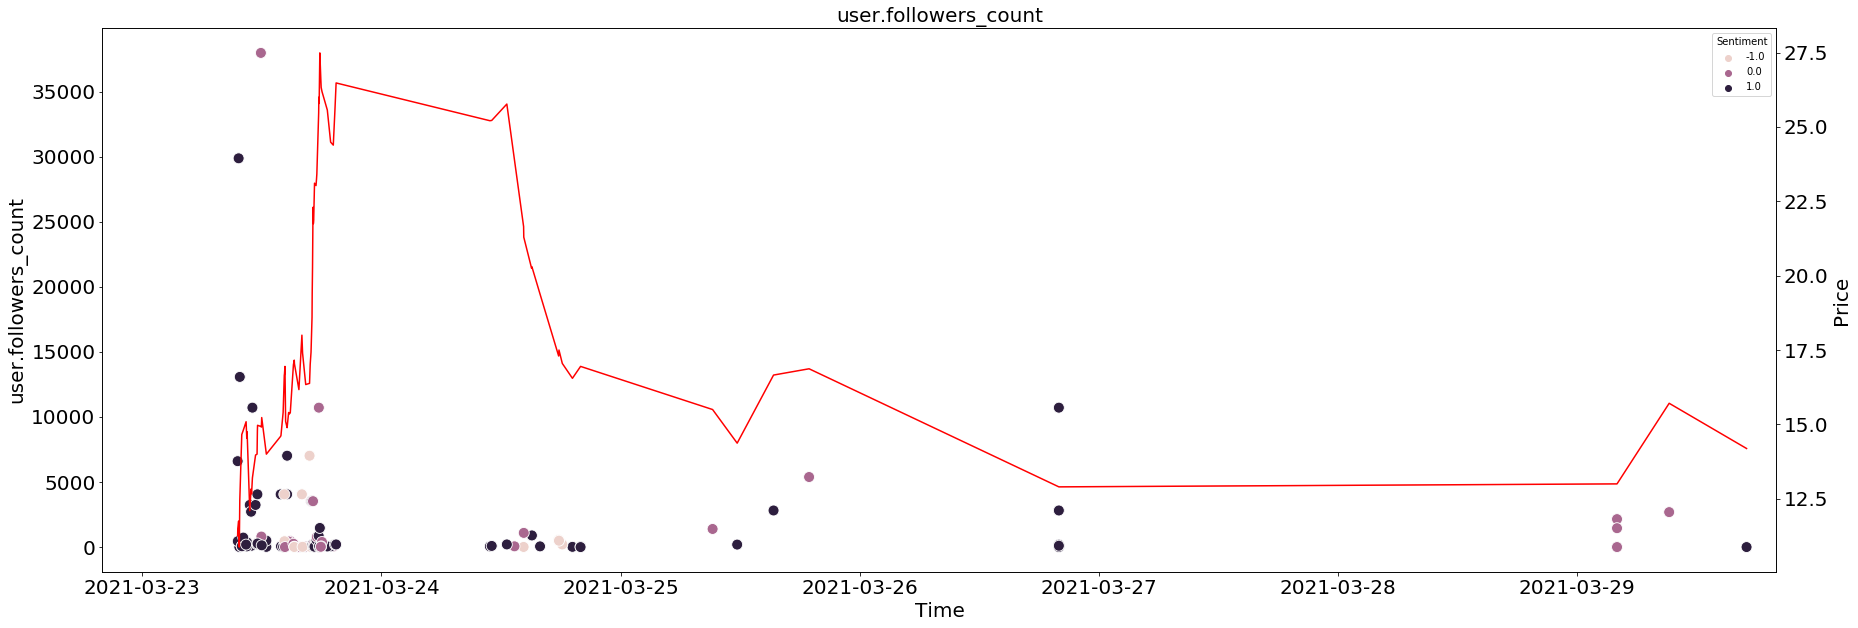

In [86]:
plot_vs_price(labeled_data_price, 'user.followers_count', 'DLPN', "2021-03-23", "2021-03-30", save_loc=r'C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\DPLN_Sentiment.png')

Generating scatter plot vs price for EEENF


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


Done
File saved to C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\EEENF_Sentiment.png


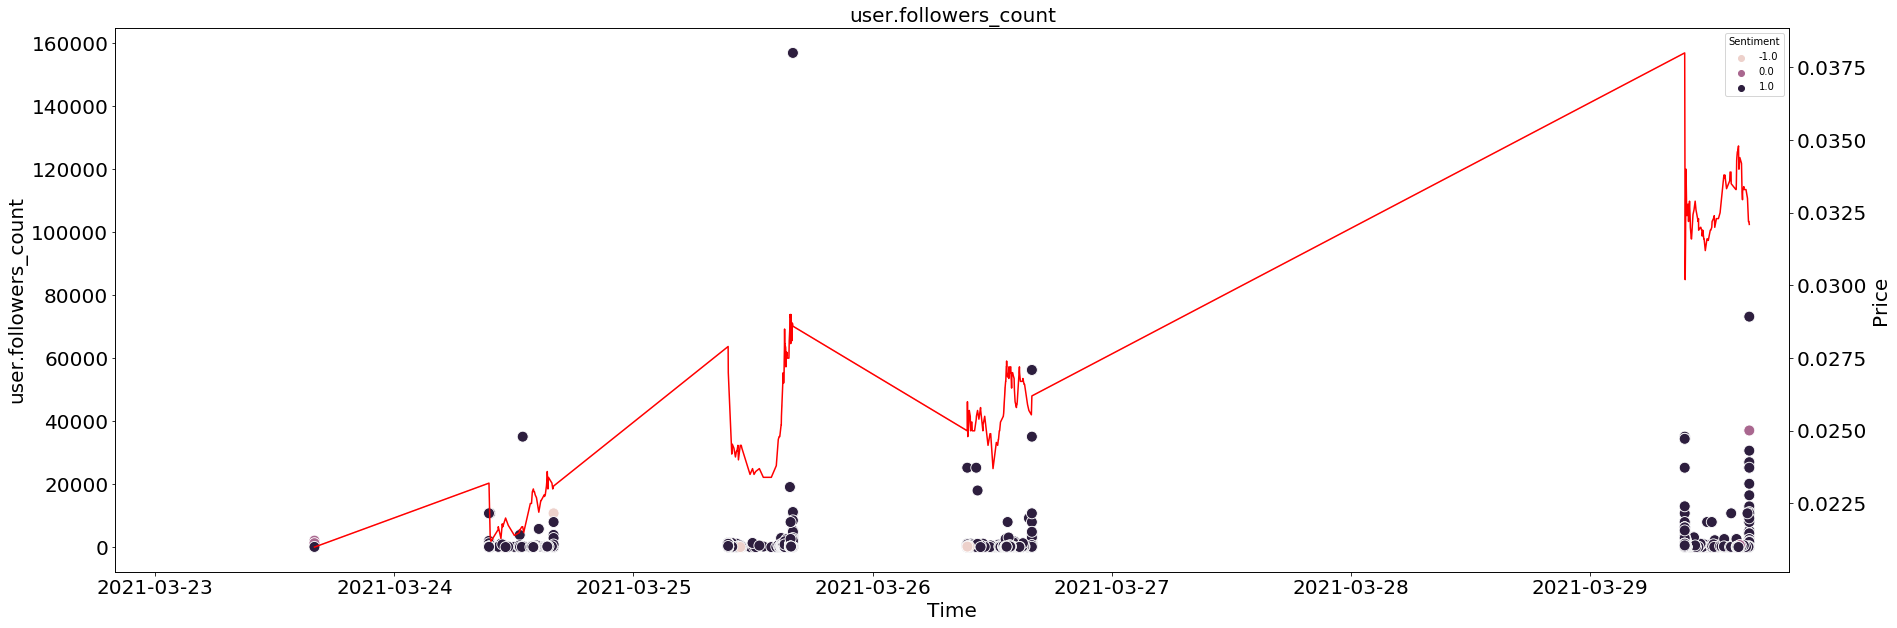

In [87]:
plot_vs_price(labeled_data_price, 'user.followers_count', 'EEENF', "2021-03-23", "2021-03-30", save_loc=r'C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\EEENF_Sentiment.png')

Generating scatter plot vs price for GYST


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


Done
File saved to C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\GYST_Sentiment.png


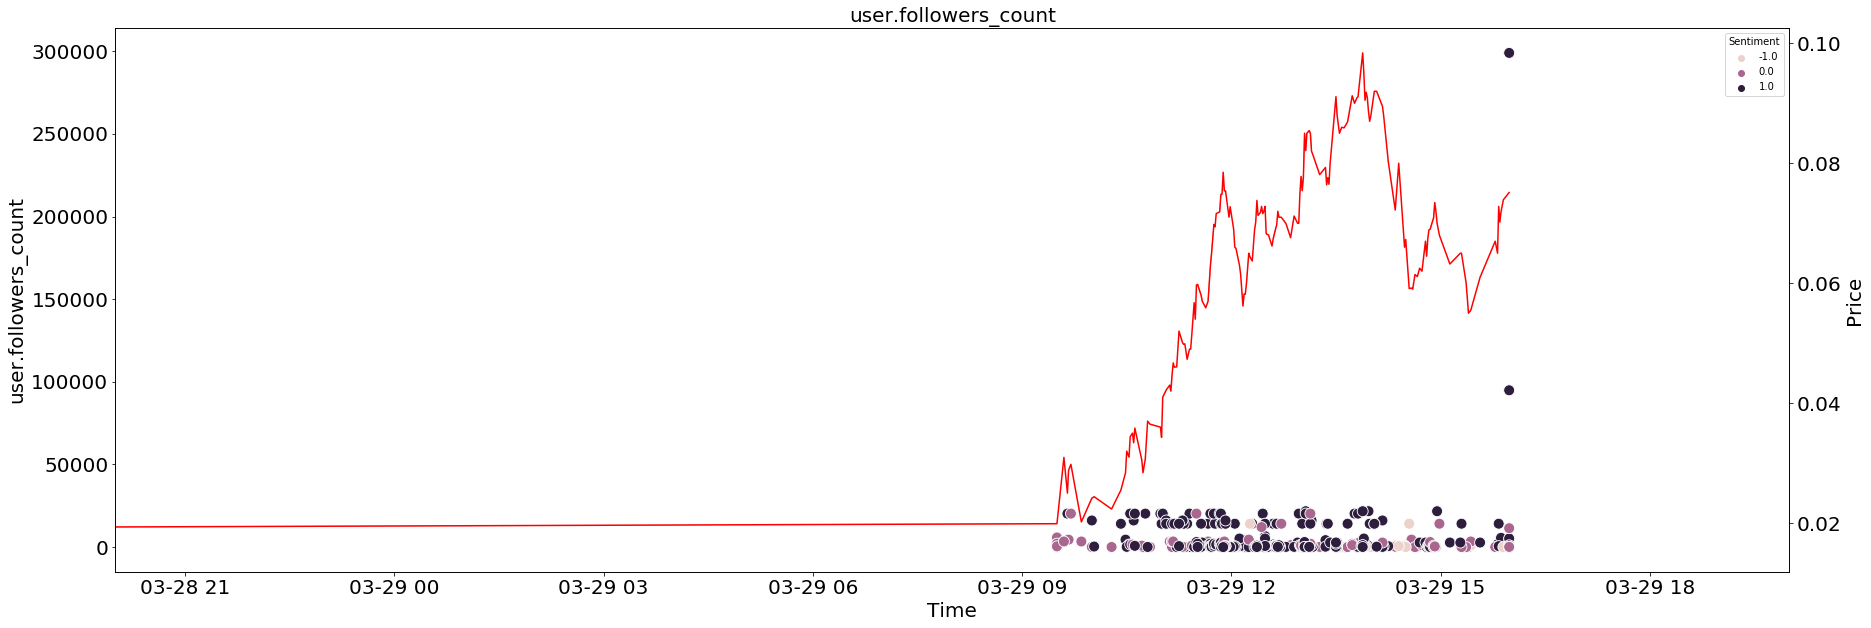

In [90]:
plot_vs_price(labeled_data_price, 'user.followers_count', 'GYST', "2021-03-29", "2021-03-30", save_loc=r'C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\GYST_Sentiment.png')

In [91]:
labeled_data_price[labeled_data_price['user.followers_count'] > 100000]

,Close,Datetime,Datetime_eastern,High,Known_Pumper,Low,Open,Sentiment,Volume,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata.iso_language_code,metadata.result_type,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.metadata.iso_language_code,quoted_status.metadata.result_type,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_statu

In [1]:
# Focusing on GYST
df = labeled_data[labeled_data['stock'] == 'GYST']
df_price = data[data['stock'] == 'GYST']
fig, ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y='user.followers_count', s=120, hue=df['Sentiment'])
ax1.set_xlim("2021-03-29", "2021-03-30")
ax1.set_title("$GYST Twitter Sentiment vs Price", fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("User Followers",fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_price, x=df_price['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)

NameError: name 'labeled_data' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


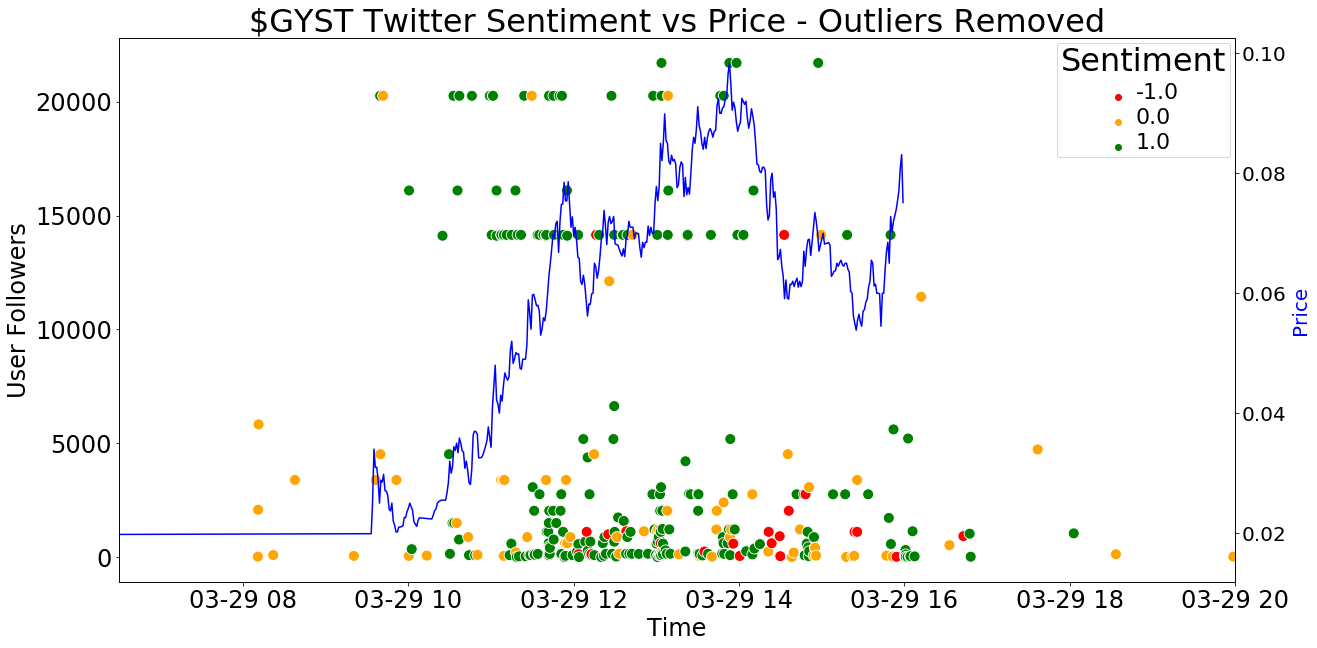

In [134]:
color_dict = dict({-1:'red',
                  0:'orange',
                  1: 'green'})
# Focusing on GYST
df = labeled_data[labeled_data['stock'] == 'GYST']
df = df[df['user.followers_count'] < 50000]
df_price = data[data['stock'] == 'GYST']
fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y='user.followers_count', s=120, hue=df['Sentiment'], palette=color_dict)
ax1.set_xlim("2021-03-29 10:30:00", "2021-03-30")
ax1.set_title("$GYST Twitter Sentiment vs Price - Outliers Removed", fontsize=32)
ax1.set_xlabel("Time",fontsize=24)
ax1.set_ylabel("User Followers",fontsize=24)
ax1.tick_params(labelsize=24)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_price, x=df_price['Datetime_eastern'], y="Open", color='blue')
ax2.set_ylabel("Price",fontsize=20, color="blue")
ax2.tick_params(labelsize=20)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='32') # for legend title
fig.savefig(r"C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\GYST_Sentiment.png")

Reformatting to focus on GYST plot.

In [23]:
# Pull new price data 
GYST_price = yf.download(tickers='GYST', start="2021-03-29", end="2021-04-1", interval='1m' , group_by='ticker', auto_adjust=True, prepost=True, threads=True, proxy=None)
        

[*********************100%***********************]  1 of 1 completed


In [24]:
GYST_price['Datetime_eastern'] = GYST_price.index.tz_convert('US/Eastern')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


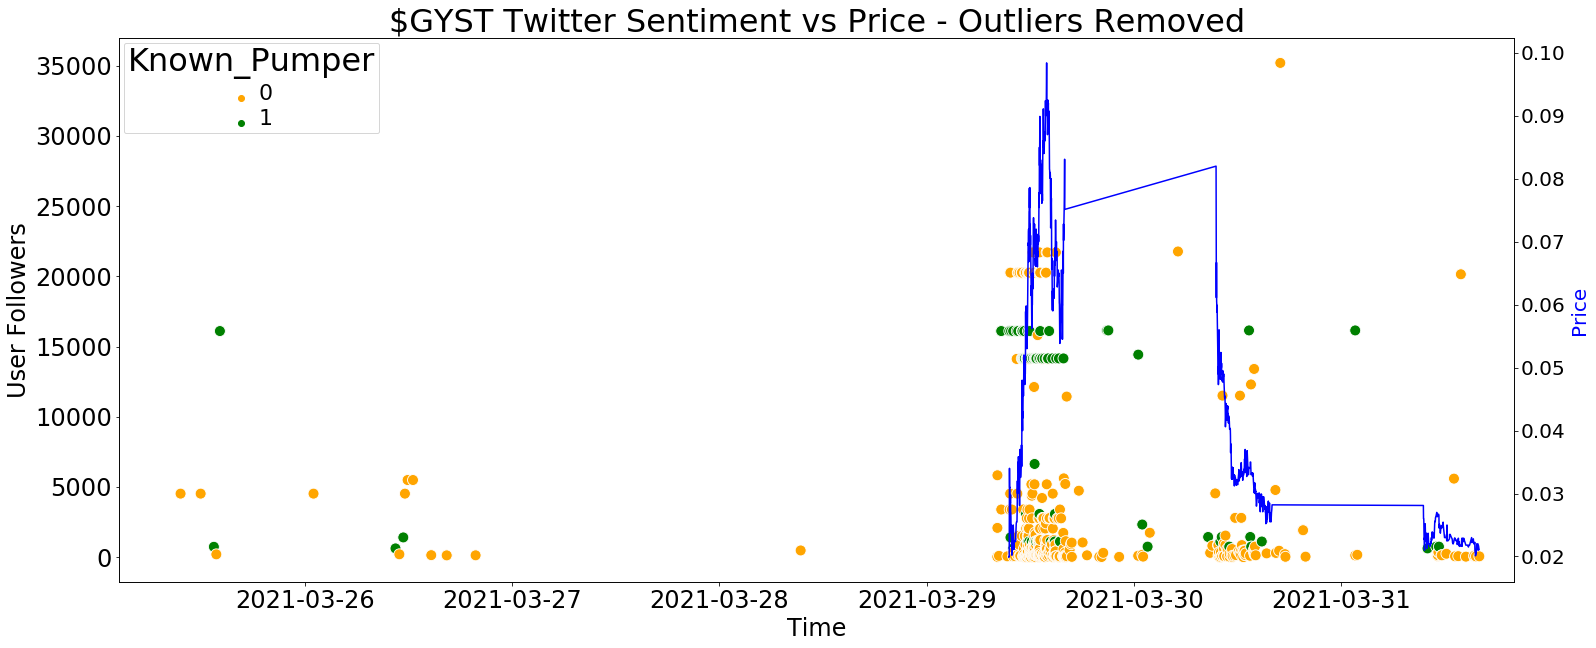

In [27]:
# Plotting with new GYST price data
color_dict = dict({-1:'red',
                  0:'orange',
                  1: 'green'})
# Focusing on GYST
df = labeled_data[labeled_data['stock'] == 'GYST']
df = df[df['user.followers_count'] < 50000]
df_price = GYST_price
fig, ax1 = plt.subplots(figsize=(25,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y='user.followers_count', s=120, hue=df['Known_Pumper'], palette=color_dict)
ax1.set_xlim("2021-03-25 06:30:00", "2021-04-1")
ax1.set_title("$GYST Twitter Sentiment vs Price - Outliers Removed", fontsize=32)
ax1.set_xlabel("Time",fontsize=24)
ax1.set_ylabel("User Followers",fontsize=24)
ax1.tick_params(labelsize=24)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_price, x=df_price['Datetime_eastern'], y="Open", color='blue')
ax2.set_ylabel("Price",fontsize=20, color="blue")
ax2.tick_params(labelsize=20)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='32') # for legend title
fig.savefig(r"C:\Users\GeorgeE\Documents\BU\CS_506\final_project\CS506Spring2021Repository\gilgo_padavick_final_project\code\feature_engineering\GYST_Known_Pumper.png")